In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
L = 1
t = 1
eps= L**2/(3*t**3)
# eta = eps**(-1/4) * nu**(3/4)
nu=0.01
eta=nu**(3/4)*eps**(-1/4)
ell_1 = eta/10
ell_2 = L/5
nu_1 = 1
nu_2 = 0.01
nu_3 = 0.000001
NUs = [nu_1, nu_2, nu_3]
Ps = [1/3,2/3,1,2,4,6]
N = 1000
M = 1000

In [18]:
def u(x, L, nu, t):
    return (x - L*np.tanh(L*x/(2*nu*t)))/(t)

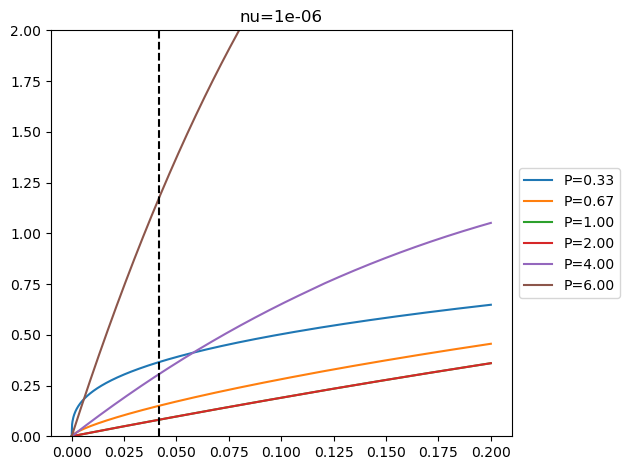

In [19]:
X=np.linspace(0,ell_2,M)
fig, ax = plt.subplots()
# for nu in NUs:
nu=nu_3
for P in Ps:
    # numerical integration of 1/2L * int_-L^L |u(x+ell) - u(x)|^P dx
    # do it for a range of ell, and plot the result
    Y = []
    for ell in X:
      xx = np.linspace(-L,L,N*10)
      u1 = u(xx+ell, L, nu, t)
      u2 = u(xx, L, nu, t)
      Y.append(1/(2*L) * np.trapz(np.abs(u1-u2)**P, xx))
      # smooth out the curve
    Y = np.array(Y)
    ax.plot(X,Y,label=f'P={P:.2f}')
# place legend outside of plot
# line at x = eta
ax.title.set_text(f'nu={nu}')
ax.axvline(eta, color='black', linestyle='--')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(0,2)
fig.tight_layout()
fig.savefig("./sp_nu={nu}.svg".format(nu=nu))

P=0.33, b=0.36
P=0.67, b=0.71
P=1.00, b=0.97
P=2.00, b=0.97
P=4.00, b=0.87
P=6.00, b=0.80


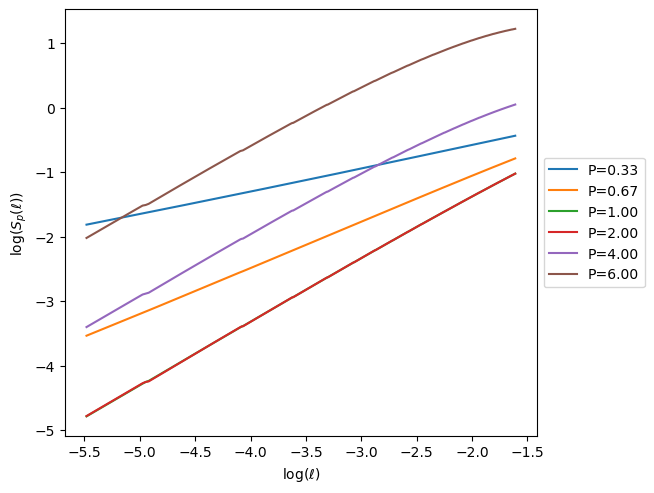

In [22]:
X = np.linspace(ell_1, ell_2, M)
fig, ax = plt.subplots()
# for nu in NUs:
nu = nu_3
for P in Ps:
    # numerical integration of 1/2L * int_-L^L |u(x+ell) - u(x)|^P dx
    # do it for a range of ell, and plot the result
    Y = []
    for ell in X:
      xx = np.linspace(-L, L, N * 10)
      u1 = u(xx + ell, L, nu, t)
      u2 = u(xx, L, nu, t)
      Y.append(1 / (2 * L) * np.trapz(np.abs(u1 - u2)**P, xx))
      # smooth out the curve
    Y = np.array(Y)
    # make a fit to the data Y = a*ell^b
    # fit a line to the log of the data
    logX = np.log(X)
    logY = np.log(Y)
    ax.plot(logX, logY, label=f'P={P:.2f}')
    # fit the slope of the line
    b = np.polyfit(logX, logY, 1)[0]
    print(f'P={P:.2f}, b={b:.2f}')
# place legend outside of plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
ax.set_xlabel(r'$\log(\ell)$')
ax.set_ylabel(r'$\log(S_p(\ell))$')
fig.savefig("./log.svg".format(nu=nu))